In [5]:
import pandas as pd
data = pd.read_csv("lipo.csv")

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
import numpy as np

In [7]:
import re

regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string
regex.sub('', 'ab3d*E')
#Out: 'abdE'

'abdE'

In [8]:
data['Simple_SMILES']=data['smiles'].apply(lambda x: regex.sub('',x))


In [9]:
elements=[*set(''.join(data['Simple_SMILES']))]

In [10]:
for element in elements:
    data[element]=data['Simple_SMILES'].apply(lambda x:sum(map(lambda y: 1 if element in y else 0, x)))

In [11]:
X = data[elements]
y = data["exp"]

In [13]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()
reg.fit(X,y)
pred_logd=reg.predict(X)

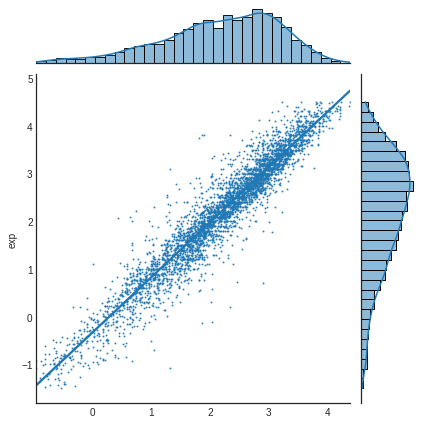

In [14]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x=pred_logd,
            y=y, 
            kind="reg", 
            scatter_kws={"s": 1});

In [15]:
r2(y,pred_logd)

0.9148601485726103